In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
                            VotingClassifier, StackingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
#data_path = "heart.xlsx"
#df = pd.read_excel(data_path)
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Rename the columns for better readability
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
                'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target']

In [5]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [6]:
df.shape

(1025, 14)

In [7]:
# Checking for missing values
print(df.isnull().sum())

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64


In [8]:
# Describe the dataset
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   ChestPainType    1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df['Target'].unique()

array([0, 1], dtype=int64)

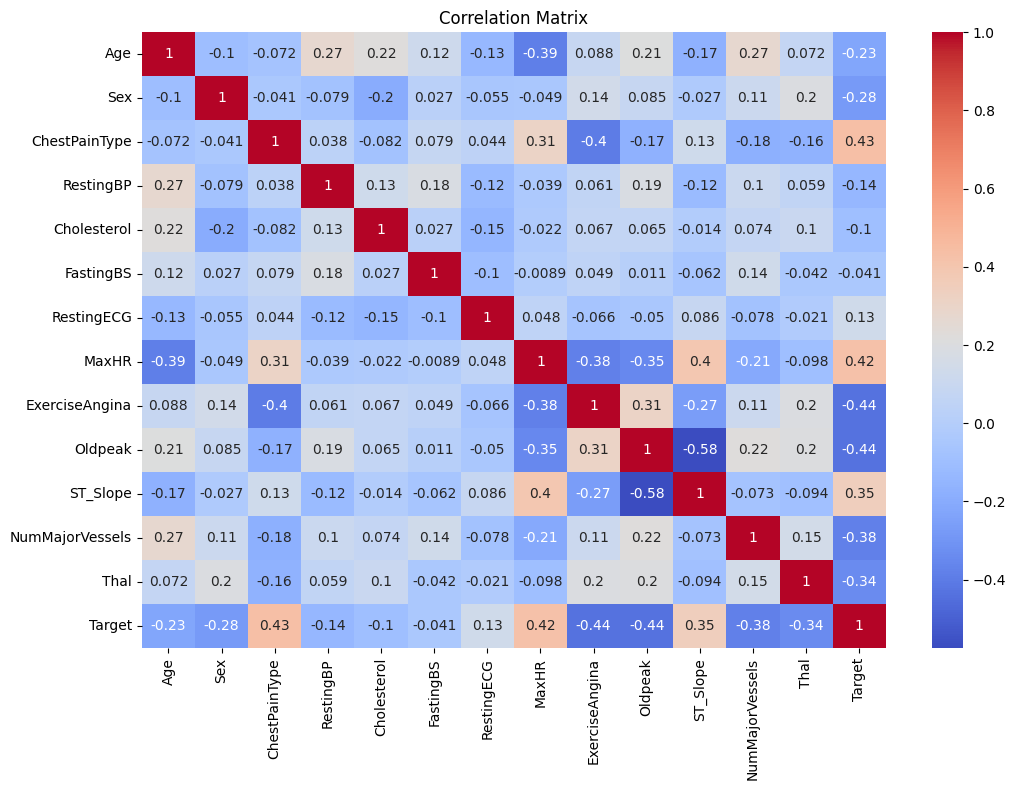

In [11]:
# Plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

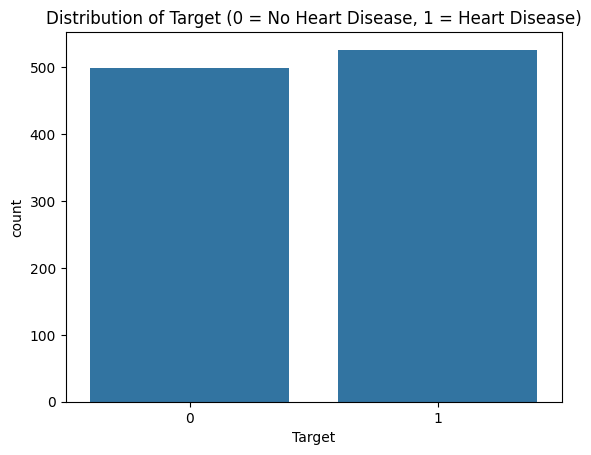

In [12]:
# Plot Target variable distribution
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

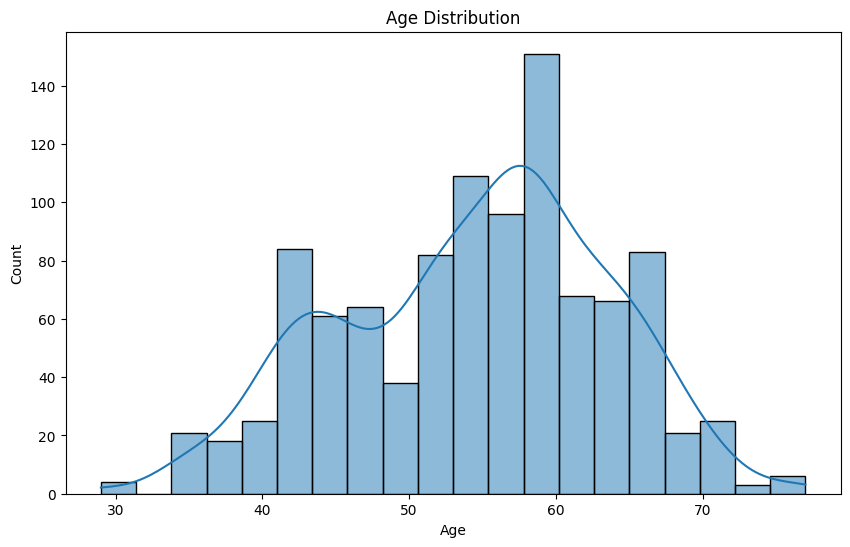

In [13]:
# Plot distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

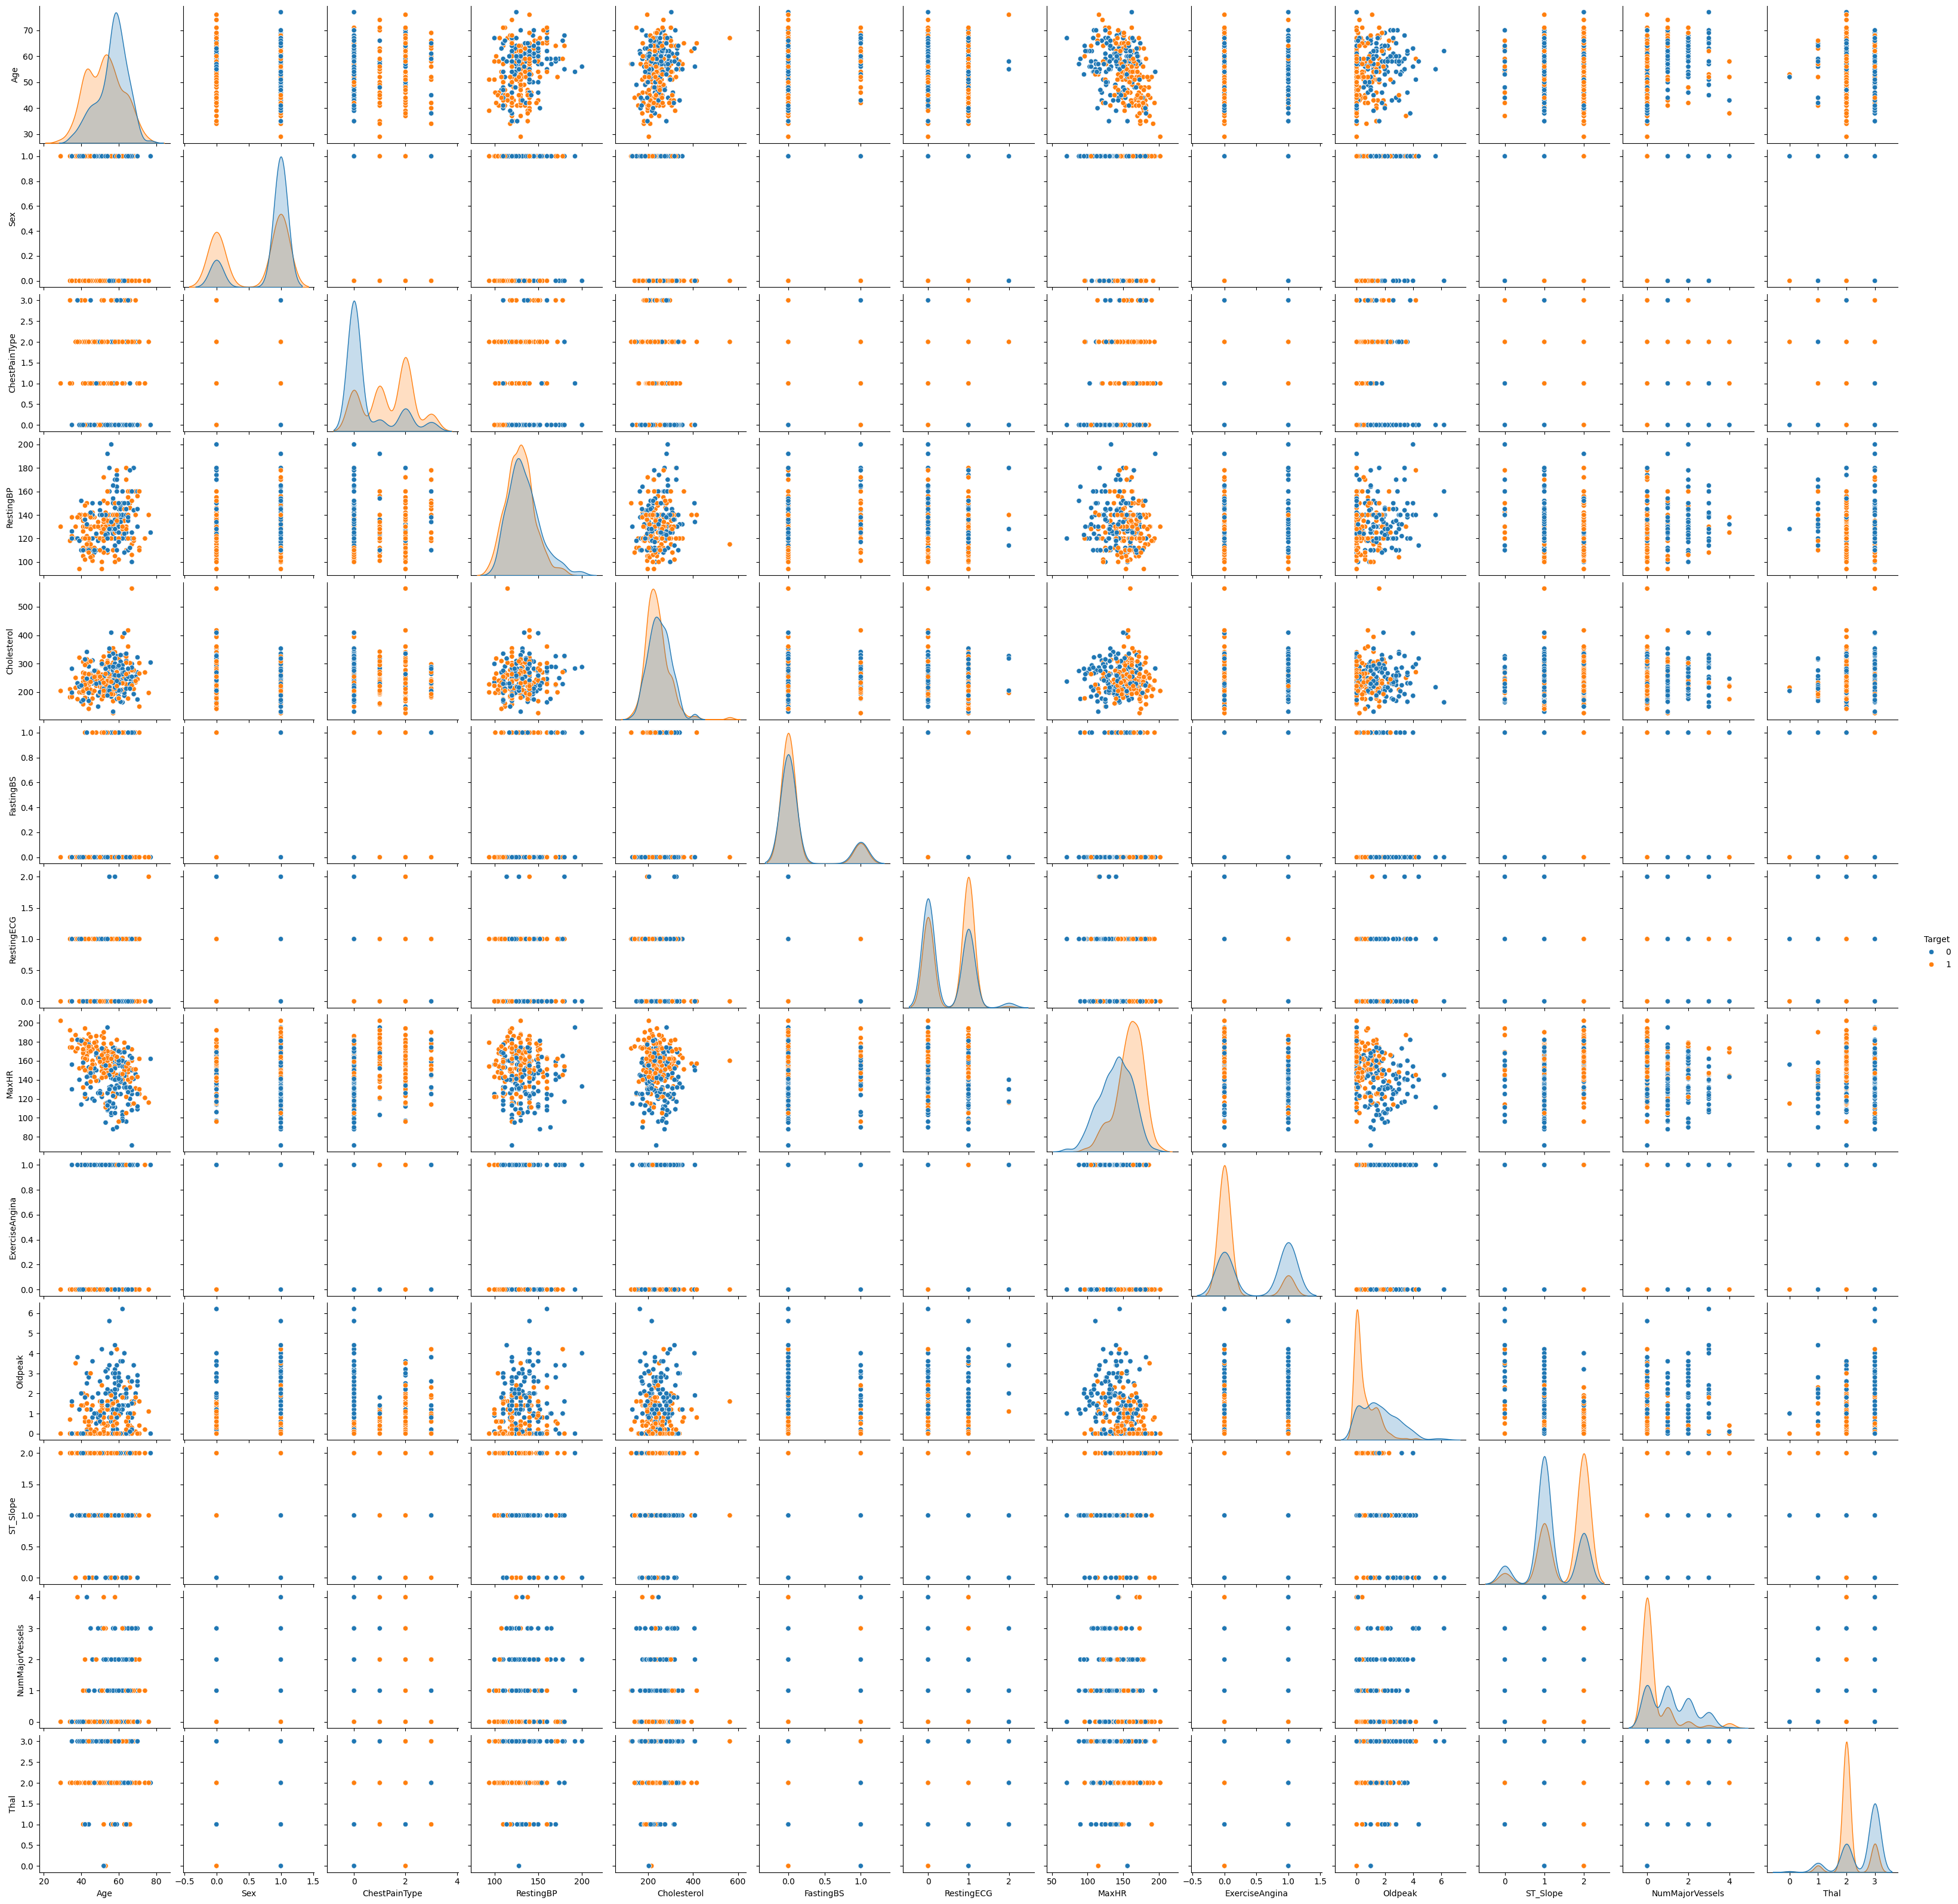

In [14]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Target')
plt.show()

In [15]:
X = df.drop('Target', axis=1)
y = df['Target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Define the models
models = {
    # Linear Models
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(max_iter=1000),
    "Passive Aggressive": PassiveAggressiveClassifier(),
    
    # Support Vector Machines
    "SVM": SVC(probability=True),
    "Linear SVM": LinearSVC(),
    
    # Tree-based Models
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    
    # Ensemble Methods
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    
    # Advanced Boosting
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    #"CatBoost": CatBoostClassifier(verbose=False),
    
    # Nearest Neighbors
    "KNN": KNeighborsClassifier(),
    "Radius Neighbors": RadiusNeighborsClassifier(),
    
    # Naive Bayes Variants
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    #"Multinomial NB": MultinomialNB(),
    #"Complement NB": ComplementNB(),
    
    # Neural Networks
    "MLP Classifier": MLPClassifier(max_iter=500),
    
    # Discriminant Analysis
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    
    # Meta Models
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('xgb', XGBClassifier())
        ],
        voting='soft'
    ),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('xgb', XGBClassifier())
        ],
        final_estimator=LogisticRegression()
    )
}

In [19]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [20]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time()  # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  # End the timer
    
    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model
        # Store the results in the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc,
        "Time (s)": elapsed_time
    })

    print(f"{name} completed in {elapsed_time:.4f} seconds.")

Logistic Regression completed in 0.0644 seconds.
Ridge Classifier completed in 0.0486 seconds.
SGD Classifier completed in 0.0477 seconds.
Passive Aggressive completed in 0.0355 seconds.
SVM completed in 0.2036 seconds.
Linear SVM completed in 0.0380 seconds.
Decision Tree completed in 0.0475 seconds.
Extra Tree completed in 0.0407 seconds.
Random Forest completed in 0.6048 seconds.
Extra Trees completed in 0.4489 seconds.
Gradient Boosting completed in 0.6491 seconds.
AdaBoost completed in 0.4003 seconds.
Bagging completed in 0.1437 seconds.
XGBoost completed in 0.7775 seconds.
[LightGBM] [Info] Number of positive: 339, number of negative: 317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 

In [21]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [22]:
# Sort by Accuracy (or any other metric of choice)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [23]:
# Display the model performance results
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
9,Extra Trees,0.981707,0.979847,0.985854,0.982418,0.999226,0.448907
23,Stacking Classifier,0.980488,0.975140,0.988235,0.981291,0.993539,8.575264
14,LightGBM,0.980488,0.975140,0.988235,0.981291,0.992557,0.437162
8,Random Forest,0.980488,0.979161,0.983473,0.981117,0.995087,0.604800
13,XGBoost,0.980488,0.977137,0.985882,0.981211,0.990591,0.777506
7,Extra Tree,0.978049,0.979062,0.978739,0.978780,0.978072,0.040653
22,Voting Classifier,0.978049,0.970494,0.988235,0.979024,0.994313,1.721505
19,MLP Classifier,0.978049,0.972545,0.985854,0.978929,0.985471,6.618937
6,Decision Tree,0.978049,0.979166,0.978768,0.978575,0.978070,0.047462
12,Bagging,0.968293,0.978995,0.959860,0.968803,0.988209,0.143737


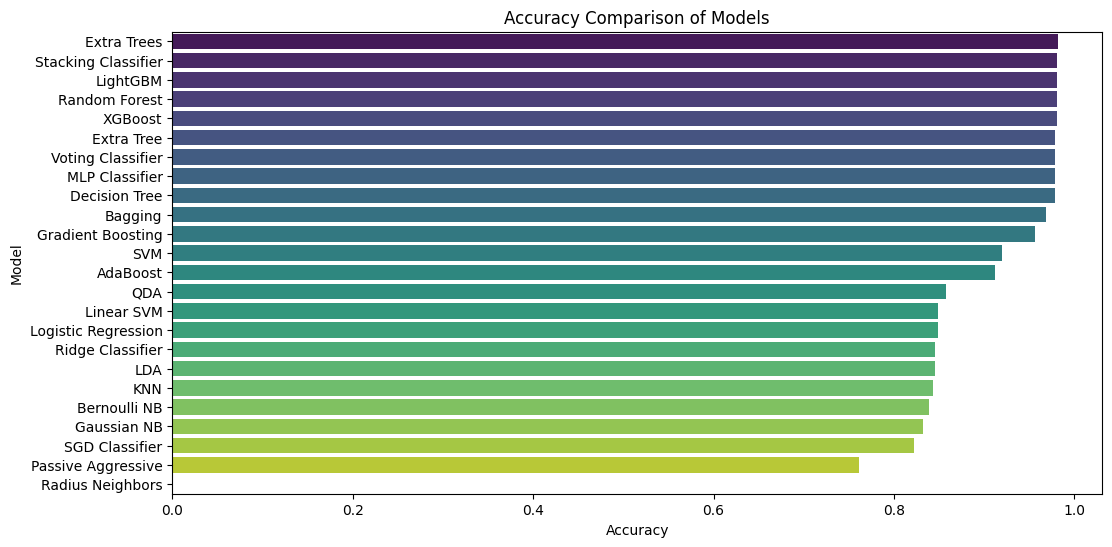

In [24]:
# Plot the model accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

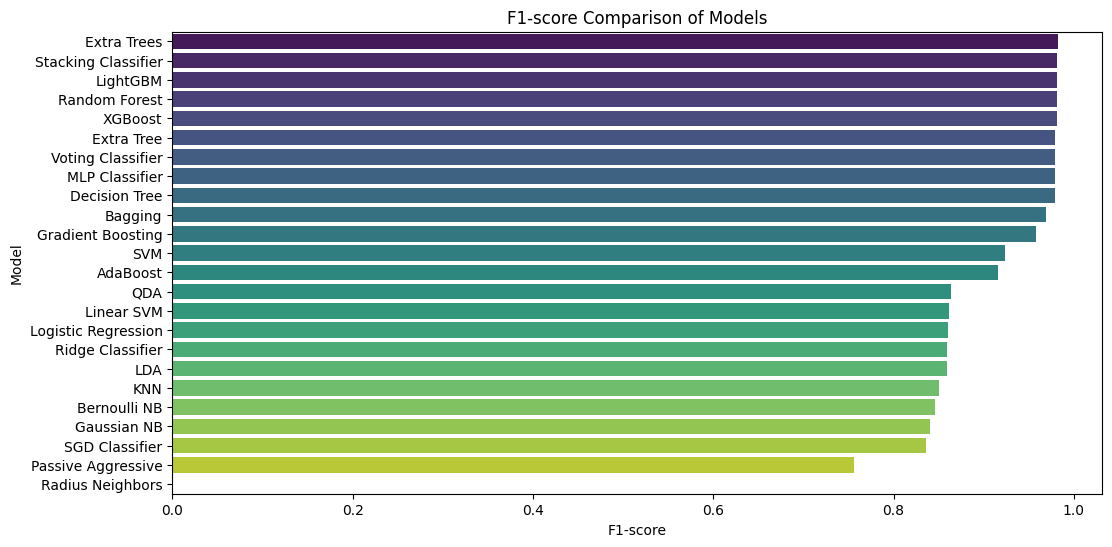

In [25]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

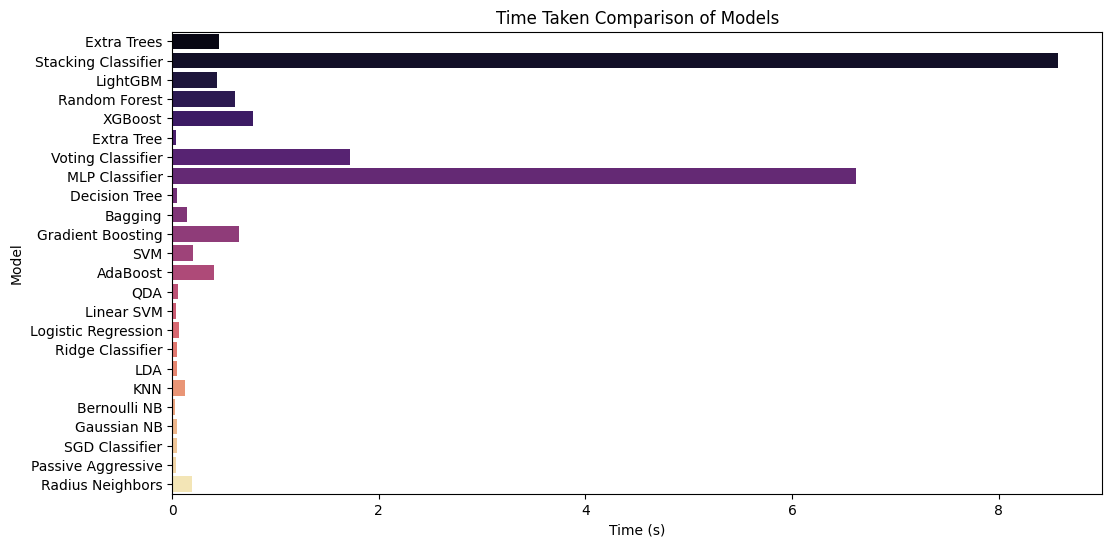

In [26]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

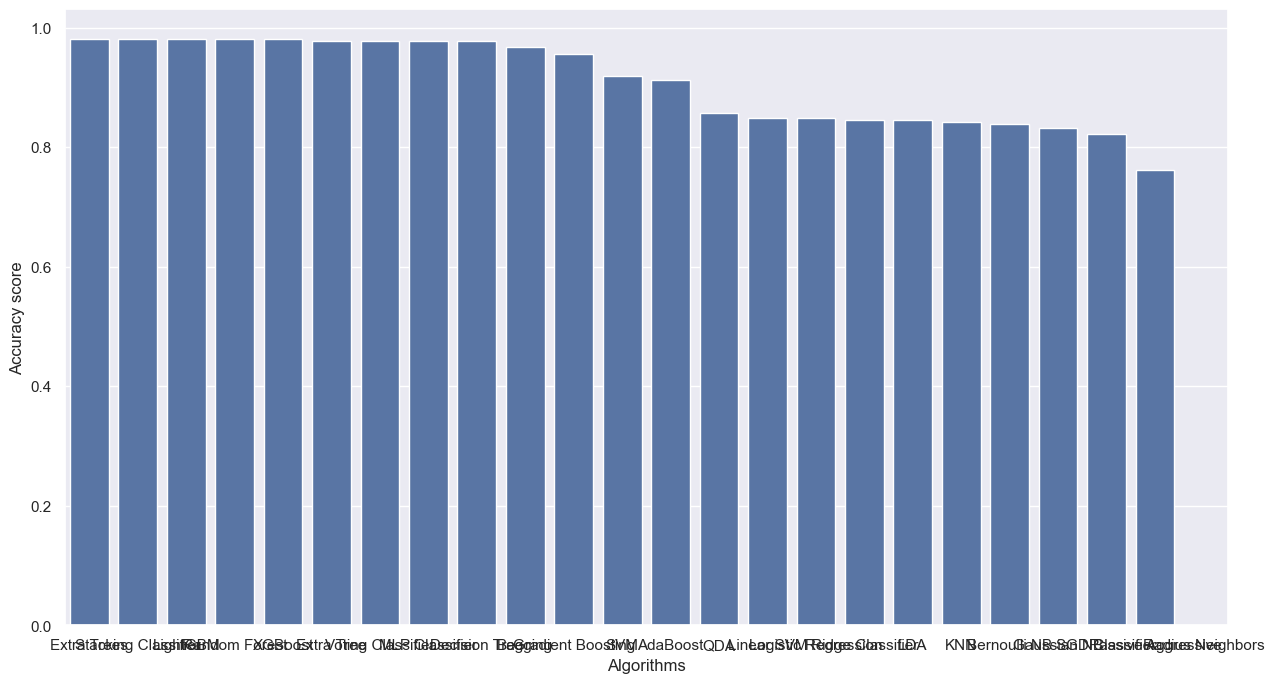

In [27]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])